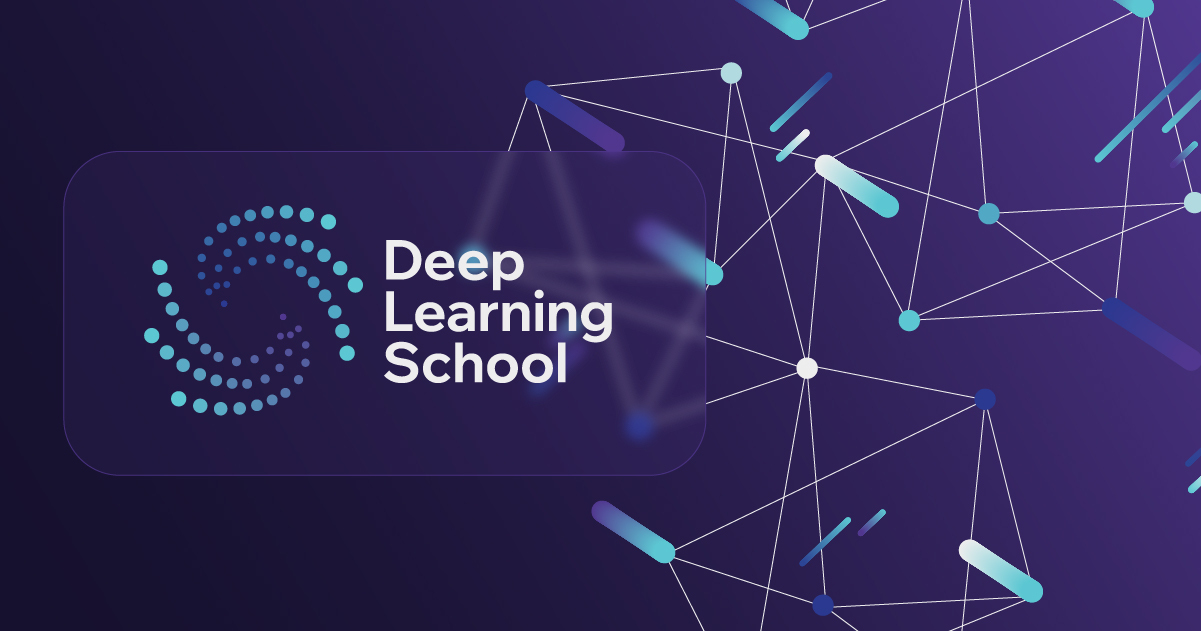

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

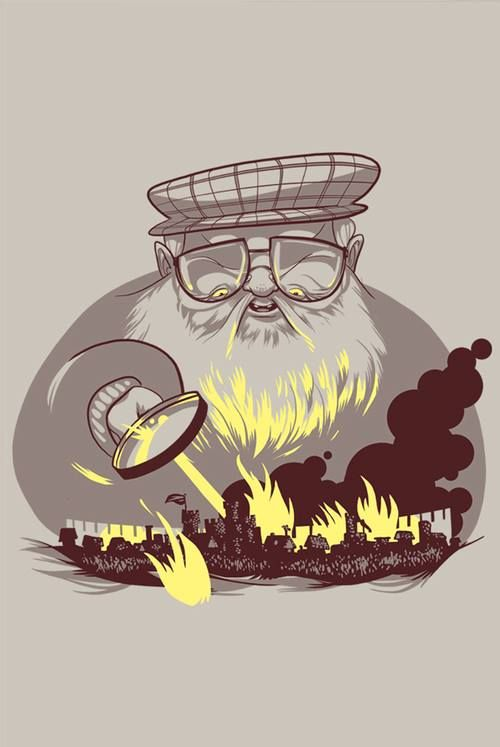

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.65$ --- 4 балла

3) $0.65 > score \geqslant 0.55$ --- 3 балла

4) $0.55 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.45$ --- 1 балл

6) $0.45 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 72.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 93.0MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [189]:
data = pd.read_csv("/content/game_of_thrones_train.csv",index_col='S.No')
data_test=pd.read_csv("/content/game_of_thrones_test.csv",index_col='S.No')

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [190]:
#посмотрим на количество NaN по столбцам
data.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [191]:
#Посмотрим как выглядят сами данные
data.sample(5)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1308,Renly Norcross,NaN,1,NaN,296.0,NaN,NaN,NaN,House Norcross,NaN,...,NaN,NaN,NaN,NaN,0,0,9.0,0,0.083612,1
613,Humfrey Clifton,Ser,1,NaN,NaN,NaN,NaN,NaN,House Clifton,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.013378,1
52,Laenor Velaryon,Ser,1,Valyrian,94.0,NaN,NaN,NaN,House Velaryon,Rhaenyra Targaryen,...,NaN,NaN,NaN,1.0,1,1,26.0,0,0.193980,0
511,Ferret,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.003344,1
1044,Garrett Flowers,NaN,0,NaN,NaN,NaN,NaN,NaN,House Tyrell,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.130435,1


In [192]:
# Функция для извлечения фамилии из имени персонажа
def extract_surname(name):
    if '(' in name:
        name = name[:name.index('(')].strip()
    surname_parts = name.split()
    surname = surname_parts[-1] if len(surname_parts) > 1 else ''
    return surname

data['surname'] = data['name'].apply(extract_surname)

# Создаем словарь для сопоставления фамилий с культурами
cult_by_surname = {}

# Находим культуру для каждой уникальной фамилии
for surname in data['surname'].unique():
    family_rows = data[data['surname'] == surname]
    # Находим наиболее часто встречающуюся культуру для этой фамилии
    culture = family_rows['culture'].mode()
    # Если культура найдена, заполняем пропущенные значения
    if len(culture) > 0:
        data.loc[(data['surname'] == surname) & data['culture'].isna(), 'culture'] = culture.iloc[0]
        cult_by_surname[surname] = culture.iloc[0]

data_test['surname'] = data_test['name'].apply(extract_surname)

cult_by_surname_test = {}

for surname in data_test['surname'].unique():
    family_rows = data_test[data_test['surname'] == surname]
    culture = family_rows['culture'].mode()
    if len(culture) > 0:
        data_test.loc[(data_test['surname'] == surname) & data_test['culture'].isna(), 'culture'] = culture.iloc[0]
        cult_by_surname_test[surname] = culture.iloc[0]


In [193]:
# Создаем словарь для сопоставления фамилий с домами(аналогично блоку сверху)
house_by_surname = {}

# Находим дом для каждой уникальной фамилии
for surname in data['surname'].unique():
    family_rows = data[data['surname'] == surname]
    house = family_rows['house'].mode()
    if len(house) > 0:
        data.loc[(data['surname'] == surname) & data['house'].isna(), 'house'] = house.iloc[0]
        house_by_surname[surname] = house.iloc[0]

house_by_surname_test = {}
for surname in data_test['surname'].unique():
    family_rows = data_test[data_test['surname'] == surname]
    house = family_rows['house'].mode()
    if len(house) > 0:
        data_test.loc[(data_test['surname'] == surname) & data_test['house'].isna(), 'house'] = house.iloc[0]
        house_by_surname_test[surname] = house.iloc[0]


In [194]:
# Создаем словарь для сопоставления домов с культурами
cult_by_house = {}

# Находим культуру для каждого дома
for house in data['house'].unique():
    if not pd.isna(house):
        house_rows = data[data['house'] == house]
        # Находим наиболее часто встречающуюся культуру для этого дома
        culture = house_rows['culture'].mode()
        #Заполняем пропущенные значения
        if len(culture) > 0 and (house_rows['culture'].notna().sum() > 0):
            data.loc[(data['house'] == house) & data['culture'].isna(), 'culture'] = culture.iloc[0]
            cult_by_house[house] = culture.iloc[0]

# Создаем словарь для заполнения пропущенных значений
replace_values = {}
for col in data.columns:
    if data[col].dtype == 'object':
        replace_values[col] = data[col].mode().iloc[0] if len(data[col].mode()) > 0 else ''
    else:
        replace_values[col] = data[col].median()

data.fillna(value=replace_values, inplace=True)
cult_by_house_test = {}
for house in data_test['house'].unique():
    if not pd.isna(house):
        house_rows = data_test[data_test['house'] == house]
        culture = house_rows['culture'].mode()
        if len(culture) > 0 and (house_rows['culture'].notna().sum() > 0):
            data_test.loc[(data_test['house'] == house) & data_test['culture'].isna(), 'culture'] = culture.iloc[0]
            cult_by_house_test[house] = culture.iloc[0]

replace_values_test = {}
for col in data_test.columns:
    if data_test[col].dtype == 'object':
        replace_values_test[col] = data_test[col].mode().iloc[0] if len(data_test[col].mode()) > 0 else ''
    else:
        replace_values_test[col] = data_test[col].median()

data_test.fillna(value=replace_values_test, inplace=True)

In [195]:
#тот код создаёт новый признак, который означает, выжил ли персонаж до определённого возраста (305 лет).
data['survived_to_305'] = data['dateOfBirth'] + data['age']
data['survived_to_305'] = data['survived_to_305'].apply(lambda x: 'Survived' if x >= 305 else "NotSurvived")
data['survived_to_305'].fillna('Unknown', inplace=True)
data_test['survived_to_305'] = data_test['dateOfBirth'] + data_test['age']
data_test['survived_to_305'] = data_test['survived_to_305'].apply(lambda x: 'Survived' if x >= 305 else "NotSurvived")
data_test['survived_to_305'].fillna('Unknown', inplace=True)

<ipython-input-195-adc0153acc19>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['survived_to_305'].fillna('Unknown', inplace=True)
<ipython-input-195-adc0153acc19>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [123]:
columns_to_drop = [
    'mother',
    'father',
    'heir',
    'name',
    'spouse',
    'surname',
    'isAliveMother',
    'isAliveFather',
    'isAliveHeir',
    'isAliveSpouse'
]

# Удаление столбцов,где слишком много пропусков:
data.drop(columns=columns_to_drop, inplace=True)
data_test.drop(columns=columns_to_drop, inplace=True)
data.isna().sum()

,0
title,0
male,0
culture,0
dateOfBirth,0
house,0
book1,0
book2,0
book3,0
book4,0
book5,0


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [124]:
data['isPopular'] = (data['popularity'] >= 0.5).astype(int)
data['boolDeadRelations'] = (data['numDeadRelations'] > 0).astype(int)
#чтобы не возникала кореляяция между признаками,уберем первообразные столбцы
data.drop(columns=['popularity','numDeadRelations'],inplace=True)

data_test['isPopular'] = (data_test['popularity'] >= 0.5).astype(int)
data_test['boolDeadRelations'] = (data_test['numDeadRelations'] > 0).astype(int)
data_test.drop(columns=['popularity','numDeadRelations'],inplace=True)

In [125]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}
data['culture'] = data['culture'].apply(
    lambda x: next((k for k, v in cult.items() if x.lower() in [i.lower() for i in v]), 'Unknown')
)
data_test['culture'] = data_test['culture'].apply(
    lambda x: next((k for k, v in cult.items() if x.lower() in [i.lower() for i in v]), 'Unknown')
)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

Построим гистограммы для каждого количественного признака в данных, чтобы визуализировать распределение значений для двух категорий героев: выживших(зеленый) и не выживших(красный).

Если гистограммы для выживших и не выживших героев сильно перекрываются, это указывает на то, что данный признак не является сильным показателем между этими двумя категориями. Другими словами, признак не сильно различается между выжившими и не выжившими.

**Наиболее важными** для нас будут те признаки, гистограммы которых для выживших и не выживших героев перекрываются не сильно. Это означает, что такие признаки могут быть более информативными для прогнозирования выживаемости героев

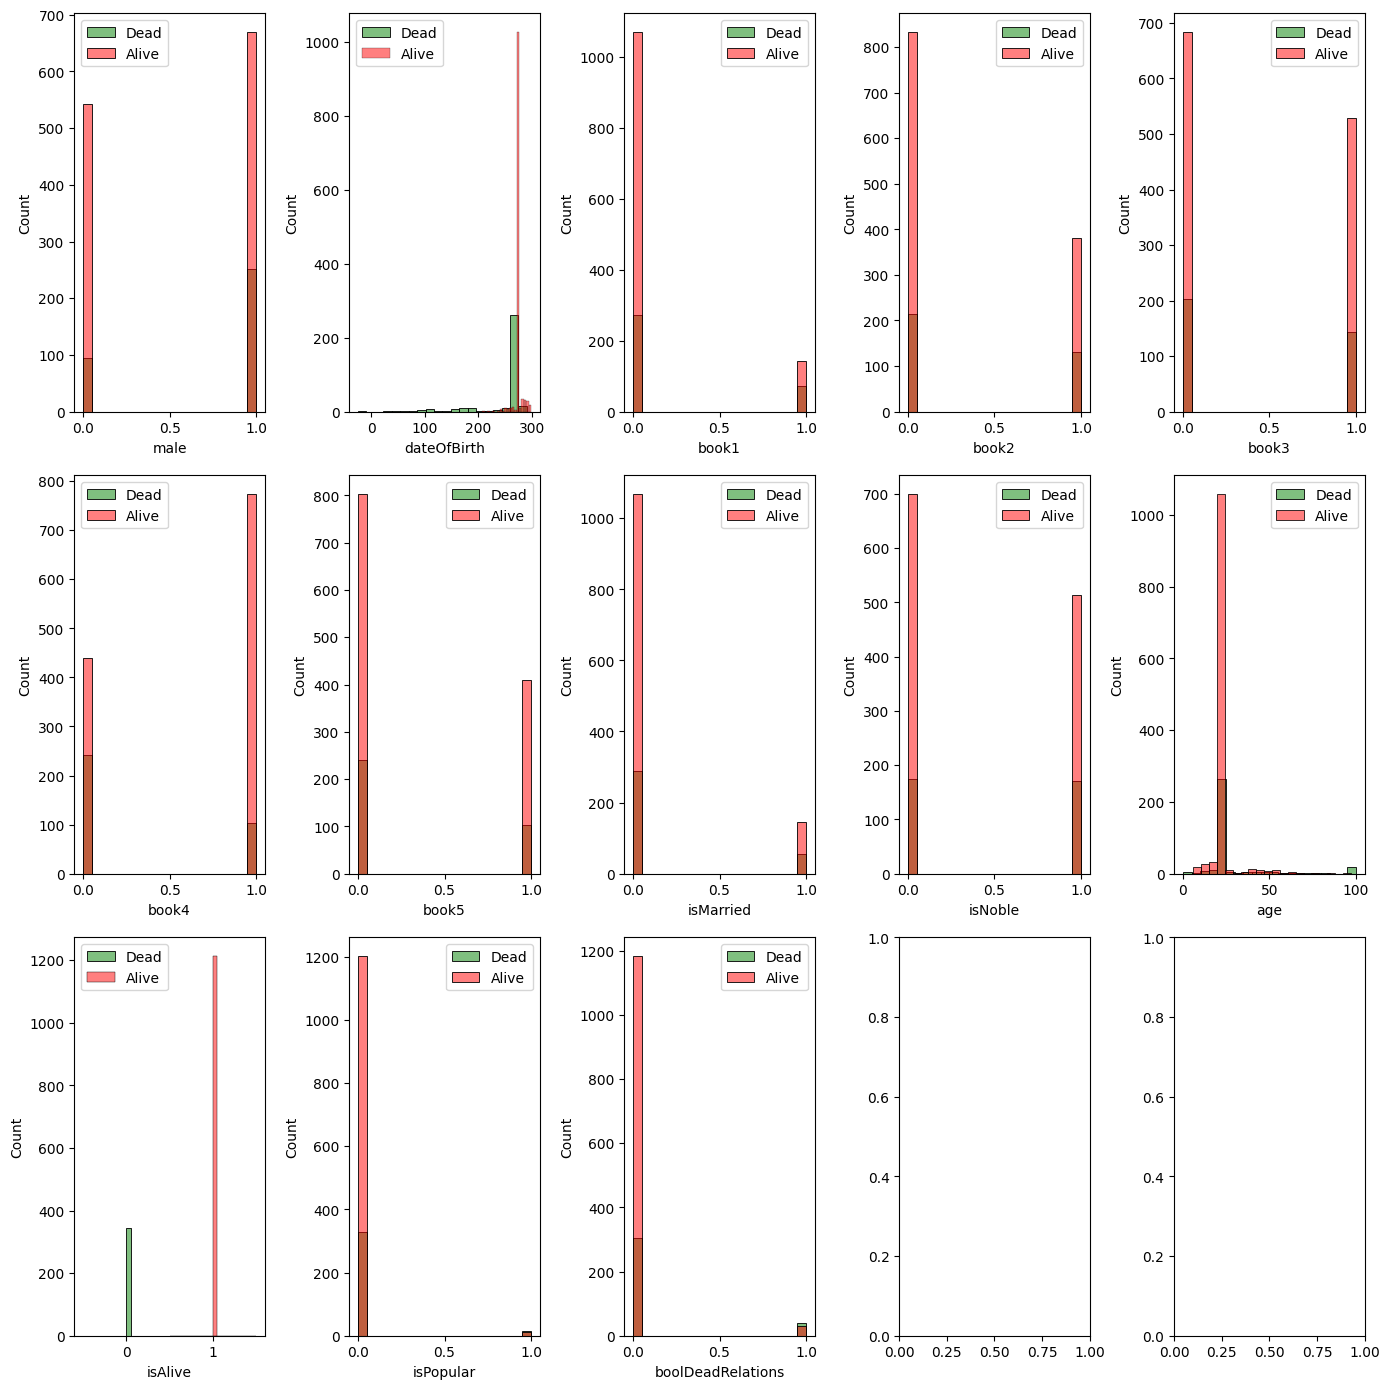

In [126]:
numCols = [col for col in data.columns if data[col].dtype != 'object']
ncols = 5
nrows = len(numCols) // ncols + 1

fig, axs = plt.subplots(nrows, ncols, figsize=(14, 14))
axs = axs.flatten()

for i, col in enumerate(numCols):
    sns.histplot(data.loc[data['isAlive'] == 0, col].astype('float32'), ax=axs[i],
                 bins=20, color='green', alpha=0.5, label='Dead')
    sns.histplot(data.loc[data['isAlive'] == 1, col].astype('float32'), ax=axs[i],
                 bins=20, color='red', alpha=0.5, label='Alive')
    axs[i].set_xlabel(col)
    axs[i].legend()

fig.tight_layout()
plt.show()

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

По графику можно заметить,что у нас дисбаланс,скорее всего,оптимальным выбором модели будет RandomForest.
Надо будет учесть дисбаланс класса при дальнейшем разбиении выборки на тренировочную и тестовую.

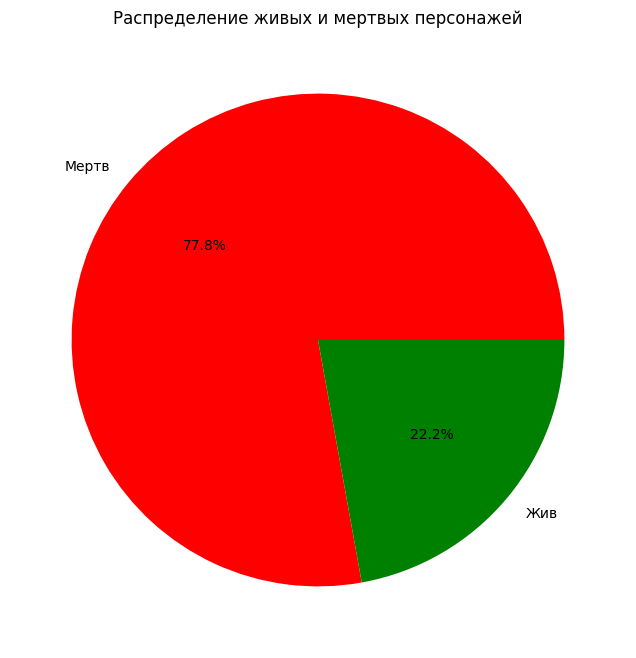

In [127]:
alive_counts = data['isAlive'].value_counts()

plt.figure(figsize=(8, 8))
alive_counts.plot.pie(labels=['Мертв', 'Жив'], autopct='%1.1f%%', colors=['red','green'])
plt.title('Распределение живых и мертвых персонажей')
plt.axis('off')
plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

(0.0, 20.0)

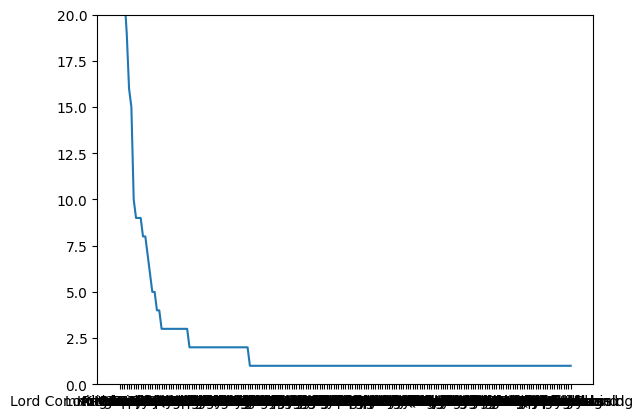

In [128]:
plt.plot(data.title.value_counts())
plt.ylim(0,20)

По графику понимаем, что в распределении этого признака есть много уникальных или редких значений, которые встречаются с низкой частотой. Это похоже на концепцию "тяжёлых хвостов" в статистике.
То есть большинство значений встречаются редко, что делает признак менее информативным для общего анализа или моделирования. Это потому, что редкие значения не дают достаточно информации о общем поведении данных.

Возьмем условный порог,судя по графику,пусть это будет 3.


In [129]:
titleTresh = 3
tFreqs = data.title.value_counts()
for t in data.title.unique():
    if tFreqs[t] <= titleTresh:
        data.title.replace({t:'uncom_title'}, inplace=True)

tFreqs = data_test.title.value_counts()
for t in data_test.title.unique():
    if tFreqs[t] <= titleTresh:
        data_test.title.replace({t:'uncom_title'}, inplace=True)


<ipython-input-129-ffc912f15bfa>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.title.replace({t:'uncom_title'}, inplace=True)
<ipython-input-129-ffc912f15bfa>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

(0.0, 20.0)

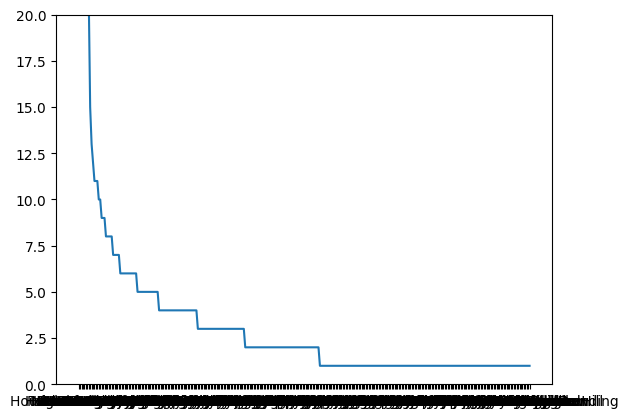

In [130]:
plt.plot(data.house.value_counts())
plt.ylim(0, 20)

С домами ситуация полностью аналогичная,поступим так же


In [131]:
houseTresh = 3
hFreqs = data.house.value_counts()
for h in data.house.unique():
    if hFreqs[h] <= houseTresh:
        data.house.replace({h:'uncom_house'}, inplace=True)

hFreqs = data_test.house.value_counts()
for h in data_test.house.unique():
    if hFreqs[h] <= houseTresh:
        data_test.house.replace({h:'uncom_house'}, inplace=True)

<ipython-input-131-81958817d380>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.house.replace({h:'uncom_house'}, inplace=True)
<ipython-input-131-81958817d380>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [132]:
# Преобразуем все категориальные столбцы с помощью OneHot кодирования
data = pd.get_dummies(data, columns=data.select_dtypes(include='object').columns, drop_first=True)
data_test = pd.get_dummies(data_test, columns=data_test.select_dtypes(include='object').columns, drop_first=True)

In [133]:
# Выравнивание столбцов
all_columns = set(list(data.columns) + list(data_test.columns))
data = data.reindex(columns=all_columns, fill_value=0)
data_test = data_test.reindex(columns=all_columns, fill_value=0)

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Columns: 132 entries, house_House Arryn to house_House Martell
dtypes: bool(117), float64(2), int64(13)
memory usage: 372.5 KB


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

Расммотрим "тепловую" таблицу данных,для изучения корреляции.

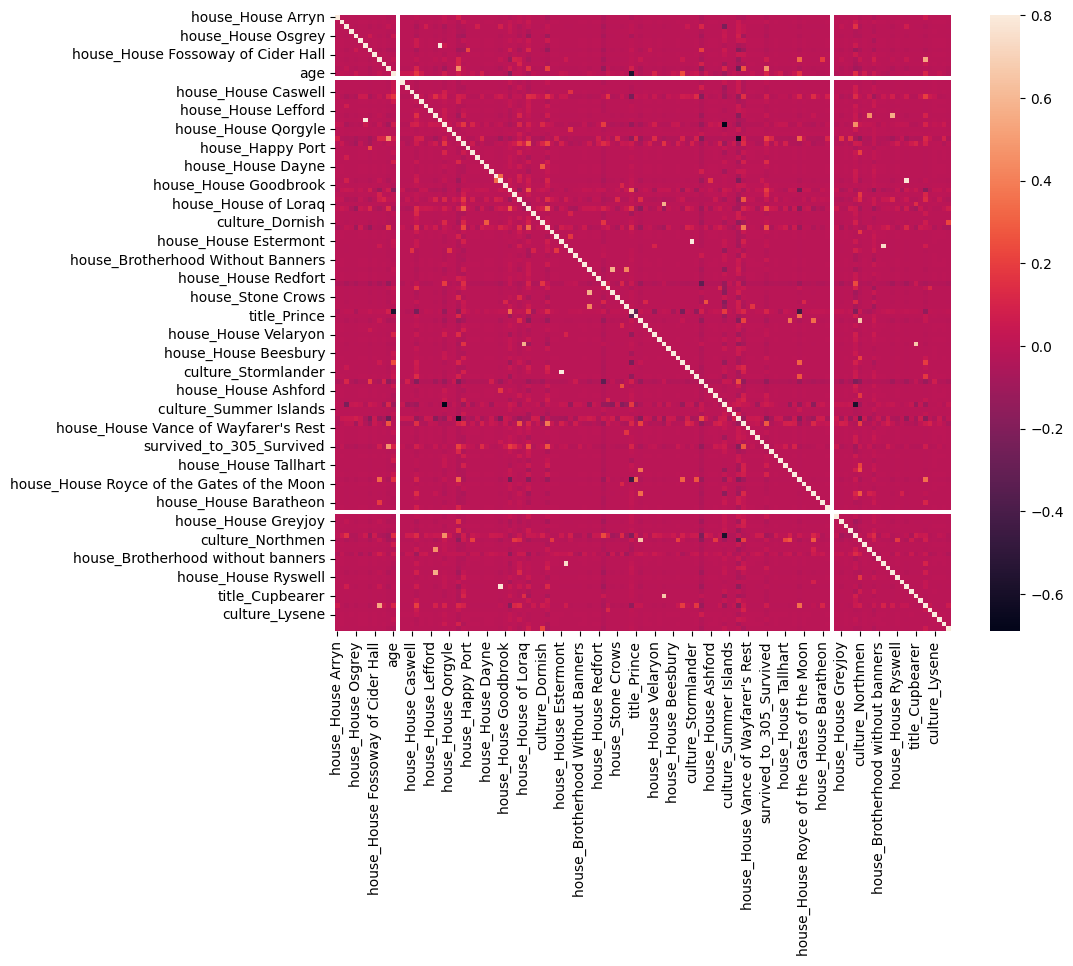

In [135]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [136]:
X = data.drop('isAlive', axis=1)
y = data['isAlive']
X_test_sub=data_test

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [137]:
from sklearn.model_selection import train_test_split

In [169]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=52,stratify=y
)

In [170]:
#Нормируем данные
from sklearn.preprocessing import MinMaxScaler
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
# Создайте объект нормализации
scaler = MinMaxScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test_sub[num_cols] = scaler.transform(X_test_sub[num_cols])

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [171]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [172]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [173]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [174]:
# Шаг 1. создание модели
RDF = RandomForestClassifier(n_estimators=500)


# Шаг 2. обучение модели
RDF.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_predrdf=RDF.predict(X_test)

In [175]:
# Шаг 1. создание модели
base_model = DecisionTreeClassifier(max_depth=1)

# Шаг 2. обучение модели
model = AdaBoostClassifier(estimator=base_model, n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_predDTC = model.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [176]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [177]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8173


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [178]:
#Посчитаем для RandomForestClassifier
y_predrdf=RDF.predict(X_test)


accuracy = accuracy_score(y_test, y_predrdf)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8013


In [179]:
#Посчитаем для DecisionTreeClassifier
y_predDTC = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predDTC)
print(f"Accuracy : {accuracy}")

Accuracy : 0.8333333333333334


Выберите лучшую модель.
Лучший результат показал DecisionTreeClassifier,с использованием AdaBoost.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [180]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 14.4MB/s]


In [181]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')


In [186]:
y_pred_sub = model.predict(data_test.drop('isAlive', axis=1))
submission['isAlive'] = y_pred_sub

In [183]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [184]:
submission.to_csv("/content/new_submission.csv", index=False)